In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
flights=pd.read_csv('http://math.bu.edu/people/kolaczyk/datasets/nycflights.csv')

In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [4]:
print(flights.dtypes)

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object


In [5]:
july_flights=flights[flights['month']==7]

In [6]:
np.sum(flights['month']==7)

29425

In [7]:
flights.shape

(336776, 19)

In [8]:
july_flights_sml=july_flights[['dep_delay', 'origin', 'arr_delay']]

In [9]:
july_flights_sml.head()

,dep_delay,origin,arr_delay
250450,212.0,JFK,157.0
250451,3.0,JFK,0.0
250452,104.0,JFK,110.0
250453,193.0,LGA,188.0
250454,174.0,JFK,120.0


In [10]:
july_summary= july_flights_sml.groupby('origin').agg(
    dep_delay_mean=('dep_delay','mean'),
    dep_delay_std=('dep_delay','std'))

In [11]:
july_summary

,dep_delay_mean,dep_delay_std
origin,,
EWR,22.035112,49.505915
JFK,23.769262,53.287222
LGA,18.995163,52.020963


In [12]:
july4_flights=july_flights[july_flights['day']==4]

In [13]:
np.sum(july_flights['day']==4)

737

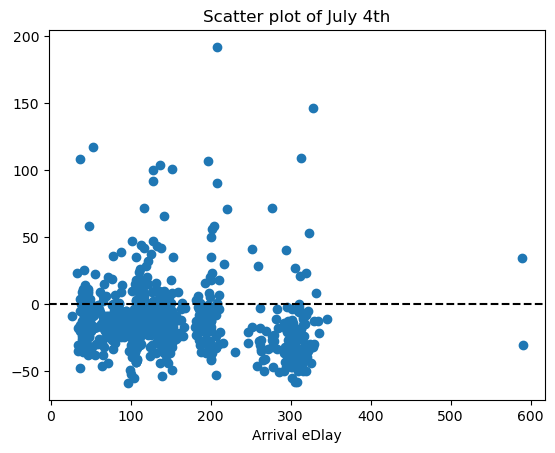

In [14]:
#plot
plt.scatter(july4_flights['air_time'],july4_flights['arr_delay'])
plt.xlabel('Air Time')
plt.xlabel('Arrival eDlay')
plt.title('Scatter plot of July 4th')
plt.axhline(y=0.0, color='black', linestyle='--')
plt.show()

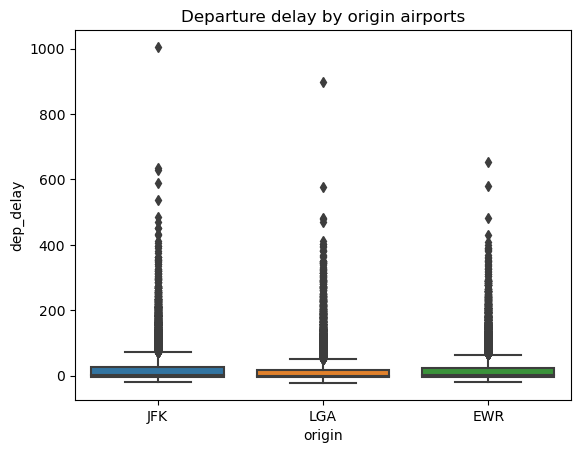

In [38]:
#seaborn
#sns.boxplot(data=july_flights_sml, x='origin', y='dep_delay')
sns.boxplot(data=july_flights_sml, x='origin', y='dep_delay')
plt.title('Departure delay by origin airports')
plt.show()

In [16]:
#creating  aleast squares model for the dep delay and arr delay
model=ols('arr_delay ~ dep_delay', data=july_flights_sml).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 1.608e+05
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:37:30   Log-Likelihood:            -1.2772e+05
No. Observations:               28293   AIC:                         2.554e+05
Df Residuals:                   28291   BIC:                         2.555e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4111      0.142    -37.988      0.0

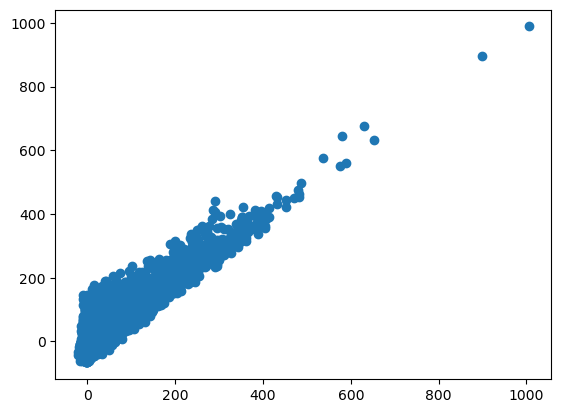

In [17]:
plt.scatter(july_flights_sml['dep_delay'],july_flights_sml['arr_delay'])

In [18]:
##Execise

In [19]:
iris=pd.read_csv('IRIS.csv')

In [20]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [21]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [22]:
print(iris['species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [23]:
print(iris['species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [24]:
iris_filtered=iris[iris['species']=='Iris-versicolor']

In [25]:
iris_filtered.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


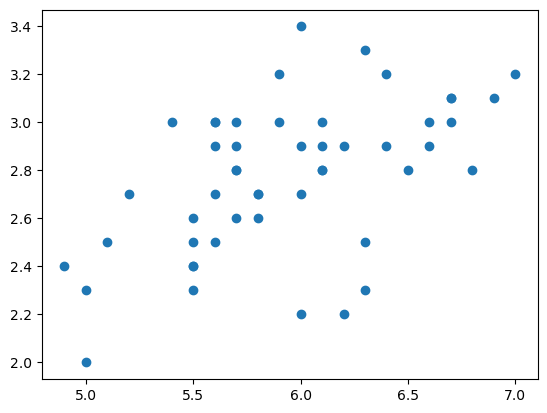

In [26]:
plt.scatter(iris_filtered['sepal_length'],iris_filtered['sepal_width'] )

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

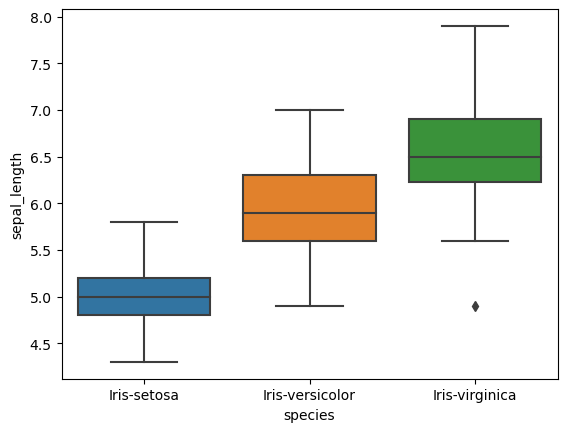

In [27]:
sns.boxplot(data=iris, x='species', y='sepal_length')

In [28]:
model1=ols('petal_length ~ petal_width', data=iris).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           5.78e-86
Time:                        12:37:30   Log-Likelihood:                -101.32
No. Observations:                 150   AIC:                             206.6
Df Residuals:                     148   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0906      0.073     14.951      

In [29]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  

  
